In [2]:
import os
import sys
import networkx as nx
import pickle
from collections import defaultdict
import matplotlib.pyplot as plt
import community

In [11]:
os.chdir('/home/user2/Downloads/sem2/mtp_prish/Louvain_mixmod')
print(os.getcwd())

/home/user2/Downloads/sem2/mtp_prish/Louvain_mixmod


In [12]:
filename = "./nets/network_0.9_1.0_0.05_1.0_0.0"
with open(filename+'_ml_network.pickle', 'rb') as handle:
        fnetwork = pickle.load(handle)
ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = fnetwork
print(edge_l, edge_c, mu, commu)

{1: 590, 2: 590} {1: 107} 0 {1: {66, 34, 164, 58, 6, 135, 168, 15, 148, 117, 180, 181, 26, 187, 189}, 2: {1, 105, 42, 138, 44, 177, 178, 18, 179, 182, 183, 151, 186, 29}, 3: {128, 130, 4, 37, 104, 137, 13, 46, 113, 146, 28, 30}, 4: {160, 3, 196, 9, 170, 139, 169, 47, 176, 49, 175, 150, 22, 152, 185}, 5: {122, 103, 72, 59, 43, 109, 147, 149, 88, 56, 91, 92, 93, 63}, 6: {161, 194, 67, 36, 197, 198, 199, 200, 74, 110, 14, 19, 53, 95, 62, 25, 155, 157, 190, 127}, 7: {97, 98, 99, 100, 162, 195, 167, 136, 10, 174, 114, 61, 55, 119, 153, 90, 27, 125, 94, 57}, 8: {32, 2, 134, 166, 8, 40, 106, 45, 115, 23, 126, 158}, 9: {64, 35, 68, 133, 131, 165, 107, 141, 80, 81, 48, 17, 87, 120, 89, 124}, 10: {132, 102, 71, 73, 11, 12, 108, 140, 16, 145, 84, 21, 54, 123}, 11: {96, 193, 192, 163, 159, 69, 70, 39, 75, 76, 172, 60, 143, 156, 50, 52, 85, 188, 191}, 12: {5, 38, 171, 77, 78, 79, 112, 173, 82, 83, 51, 116, 86, 111, 184, 121, 154}, 13: {65, 33, 7, 41, 20, 24, 31}, 14: {144, 129, 142, 101, 118}}


In [13]:
#Build a new network
g = nx.Graph()
g.add_edges_from([[1,2],[2,3],[3,1],[4,5],[1,6],[2,6],[3,6],[1,7],[2,7],[3,7],[8,9],[9,10],[8,10],[6,7]])


In [26]:
layer = defaultdict(set)
layer[1] = set([1,2,3,4,5])
layer[2] = set([6,7,8,9,10])
node_l = defaultdict(set)
node_c = defaultdict(set)
for i in range(1, 11):
    for j in g[i].keys():
        if(i in layer[1] and j in layer[1]):
            node_l[i].add(j)
        elif(i in layer[2] and j in layer[2]):
            node_l[i].add(j)
        elif(i in layer[1] and j in layer[2]):
            node_c[i].add(j)
        elif(i in layer[2] and j in layer[1]):
            node_c[i].add(j)
couple = {1:set([1,2,3,4,5,6,7,8,9,10])}
top = {1:1}
bot = {1:2}
edge_l = {1:4, 2:5}
edge_c = {1:6}
mu = 0
commu = {1:set([1,2,3,6,7]), 2: set([4,5]), 3: set([8,9,10])}

In [27]:
outfilename = "./nets/smallnetwork_ml_network.pickle"
fout = open(outfilename, 'wb')
pickle.dump((g, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu), fout,protocol = 2)
print(commu)
fout.close()

{1: {1, 2, 3, 6, 7}, 2: {4, 5}, 3: {8, 9, 10}}


In [28]:
fin = open(outfilename, 'rb')
ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = pickle.load(fin)

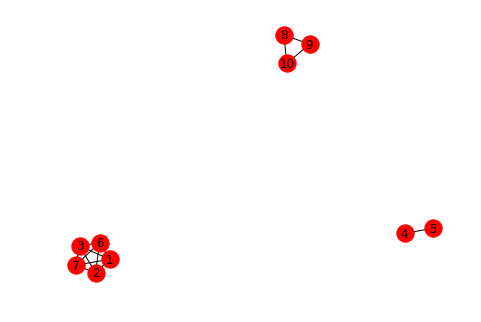

In [31]:
nx.draw(ml_network, with_labels = True)
plt.show()

In [32]:
part = community.best_partition(ml_network)
mod = community.modularity(part, ml_network)
print(mod, part)

0.4387755102040817 {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 0, 7: 0, 8: 2, 9: 2, 10: 2}


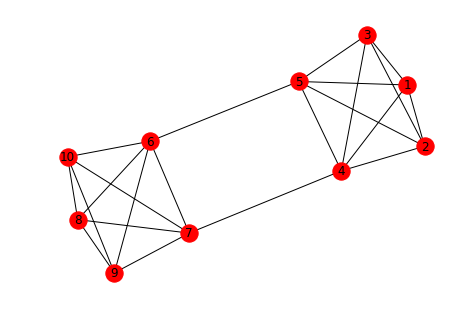

(0.40909090909090906, {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})


In [10]:
# calling best partition for testnetwork1
outfilename = "./nets/testnetwork2_ml_network.pickle"
fin = open(outfilename, 'rb')
ml_network, layer, node_l, node_c, top, bot, couple, edge_l, edge_c, mu, commu = pickle.load(fin)
nx.draw(ml_network, with_labels = True)
plt.show()
part = community.best_partition(ml_network)
mod = community.modularity(part, ml_network)
print(mod, part)